# EDA 2018
## Kickstarter

Hugo Gomez

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Chargement du dataset et découverte des données

In [2]:
# J'importe le dataset
df = pd.read_csv("dataset.csv", index_col=0)

In [3]:
# Je regarde le début de mon dataset (Les 5 premières lignes)
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Je regarde la fin de mon dataset (Les 5 dernières lignes)
df.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


Je constate dans un premier temps que une des colonnes se nomme "usd pledged", il faudrait qu'elle s'appelle "usd_pledged" pour pouvoir y accèder plus facilement dans cette analyse.

In [5]:
df = df.rename(columns={'usd pledged':'usd_pledged'})

In [6]:
# Je vérifie que le changement ai bien été appliqué..
df_col = df.columns.tolist()
df_col

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd_pledged',
 'usd_pledged_real',
 'usd_goal_real']

Le changement a bien été prit en compte !

In [7]:
# Je regarde le type de mes colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [8]:
print("Il y a {} samples et {} variables dans ce dataset.".format(df.shape[0], df.shape[1]))

Il y a 378661 samples et 14 variables dans ce dataset.


Plus grossièrement, il y a 378661 lignes (row) et 14 colonnes (columns) dans mon dataset

In [9]:
# J'explore un peu plus..
df.describe()

,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Je constate que la valeur du count pour la colonne usd_pledged n'est pas la même que pour les autres colonnes..

## 2. Analyse des valeurs manquantes et dupliquées

In [11]:
# Je regarde si le dataset contient des valeurs dupliquées
df.duplicated().sum()

0

Bonne nouvelle ! Il n'y a pas de valeurs dupliquées dans ce dataset

J'ai remarqué précédemment que la valeur du count pour la colonne usd_pledged n'est pas la même que sur les autres colonnes.

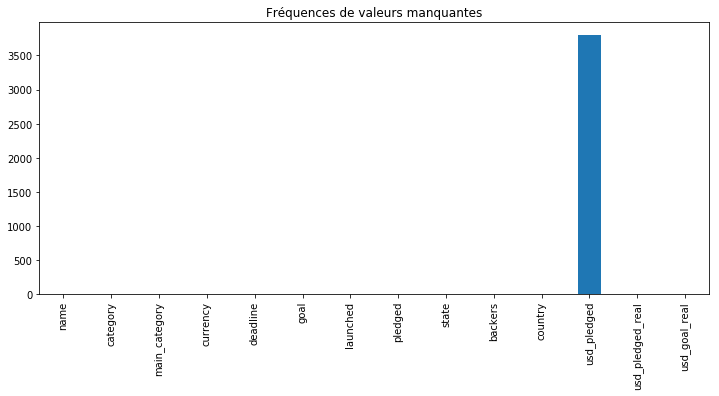

In [12]:
df.isna().sum().plot.bar(title='Fréquences de valeurs manquantes', figsize=(12,5))

On remarque encore une fois par ce graph qu'il manque des valeurs pour la colonnes usd_pledged. Je vais comparer au restes des colonnes.

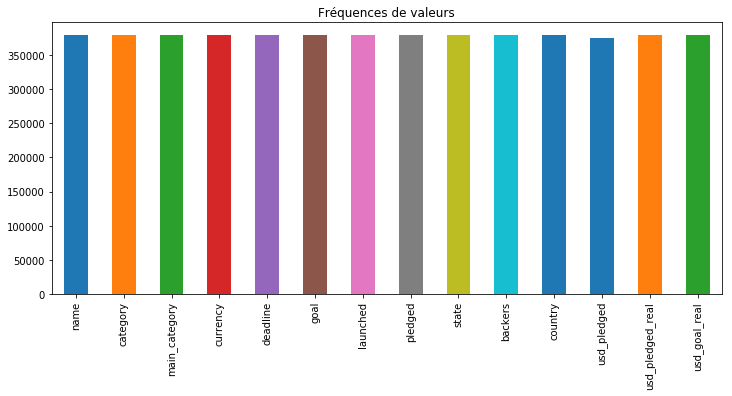

In [13]:
df.count().plot.bar(title='Fréquences de valeurs', figsize=(12,5))

On ne voit pas très bien la différence..

In [14]:
print("Il manque exactement {} valeurs dans la colonne usd_pledged".format(df["usd_pledged"].isna().sum()))

Il manque exactement 3797 valeurs dans la colonne usd_pledged


In [79]:
missing_usd_pledged_percent = df["usd_pledged"].isna().sum() / df.shape[0] * 100
print("Les lignes ou la valeur de usd_pledged n'est pas renseigné repéresente {:f}% du nombre total de ligne".format(missing_usd_pledged_percent))


Les lignes ou la valeur de usd_pledged n'est pas renseigné repéresente 1.002744% du nombre total de ligne


Ce qui n'est pas beaucoup..

En regardant les données, on se rend compte que la différence entre les variables usd_pledged et usd_pledged_real est présente uniquement lorsque la monnaie est différente de l'USD.
En regardant par exemple la ligne dont l'ID est 1000057089, si je convertis la valeur de pledged dans sa monnaie, le résultat en USD se rapproche plus de la variable usd_pledge_real que de usd_pledge. J'en conclue donc que le convertisseur de Kickstarter n'est pas précis.
De plus, il manque des valeurs dans cette colonne, je choisi donc de m'en passer.

In [149]:
df_wopledged = df.drop(labels='usd_pledged', axis=1)

## 3. Analyse des outliers

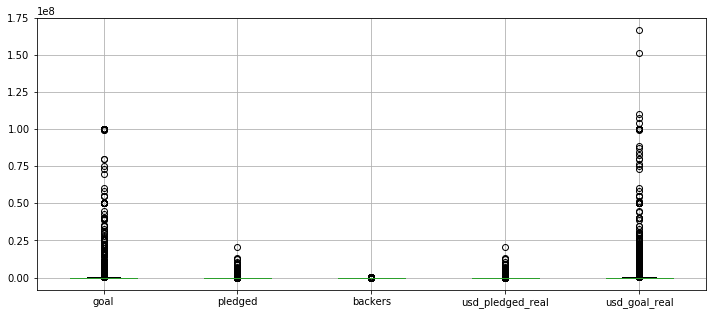

In [17]:
df_wopledged.boxplot(['goal', 'pledged', 'backers', "usd_pledged_real", "usd_goal_real"], figsize=(12, 5))

On remarque des outliers un peu partout mais surtout sur goal et sur usd_goal_real, mais je ne pense que ce soit pertinant de les faires disparaitre..

## 4. Analyse univariée

Je vais d'abord m'intéressé à la variable que je dois prédire

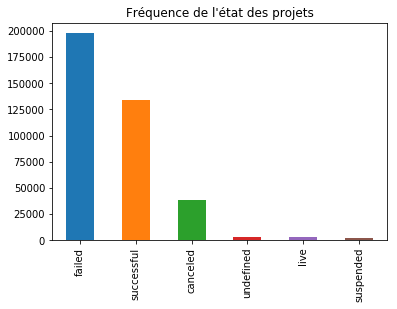

In [18]:
df_wopledged['state'].value_counts().plot.bar(title="Fréquence de l'état des projets")

Je remarque qu'il y a plus d'échec que de succès, et d'une manière assez significative.

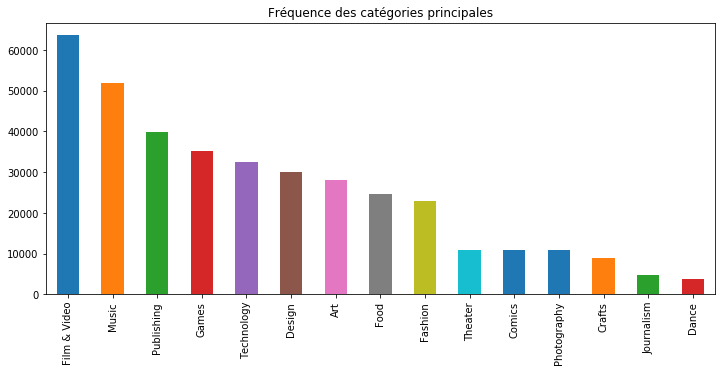

In [137]:
# Je regarde la fréquence des catégories principales (et non pas par catégorie car il y en a beaucoup trop)
df_wopledged['main_category'].value_counts().plot.bar(title="Fréquence des catégories principales", figsize=(12,5))

On remarque une dominance de la catégorie Film & Vidéo

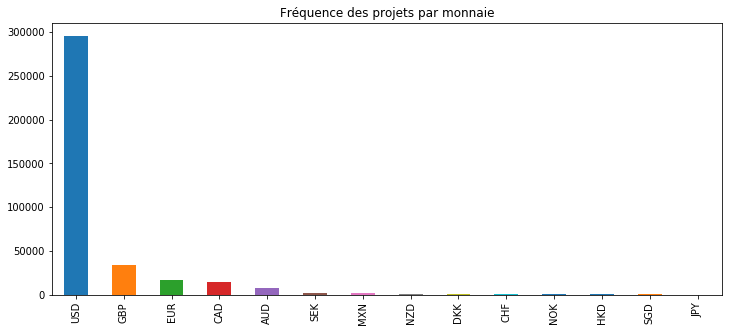

In [138]:
# Il est plus simple de comparer par monnaie car on à l'Europe en une seule variable EUR
df_wopledged['currency'].value_counts().plot.bar(title="Fréquence des projets par monnaie", figsize=(12,5))

Intéressant.. on a une majorité (écrasante) de projet financé en Dollars Américains.

Je pense qu'il serait intéressant de regarder quelles sont les catégories qui ont le plus d'échec et celle qui on le plus de succès

Text(0.5,1,"Fréquence d'échec de projet par catégorie principale")

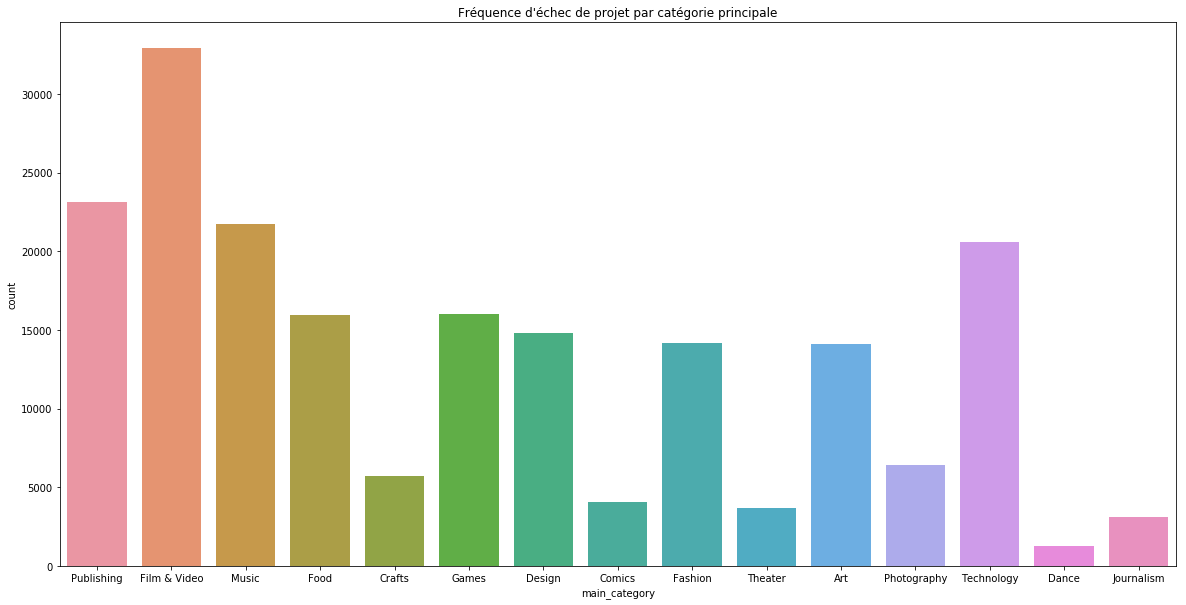

In [21]:
fig, axs = plt.subplots(nrows=1, figsize=(20,10), sharex=False)
sns.countplot(x="main_category", data=df_wopledged[df_wopledged["state"] == "failed"], ax=axs).set_title("Fréquence d'échec de projet par catégorie principale")

Text(0.5,1,'Fréquence de succès de projet par catégorie principale')

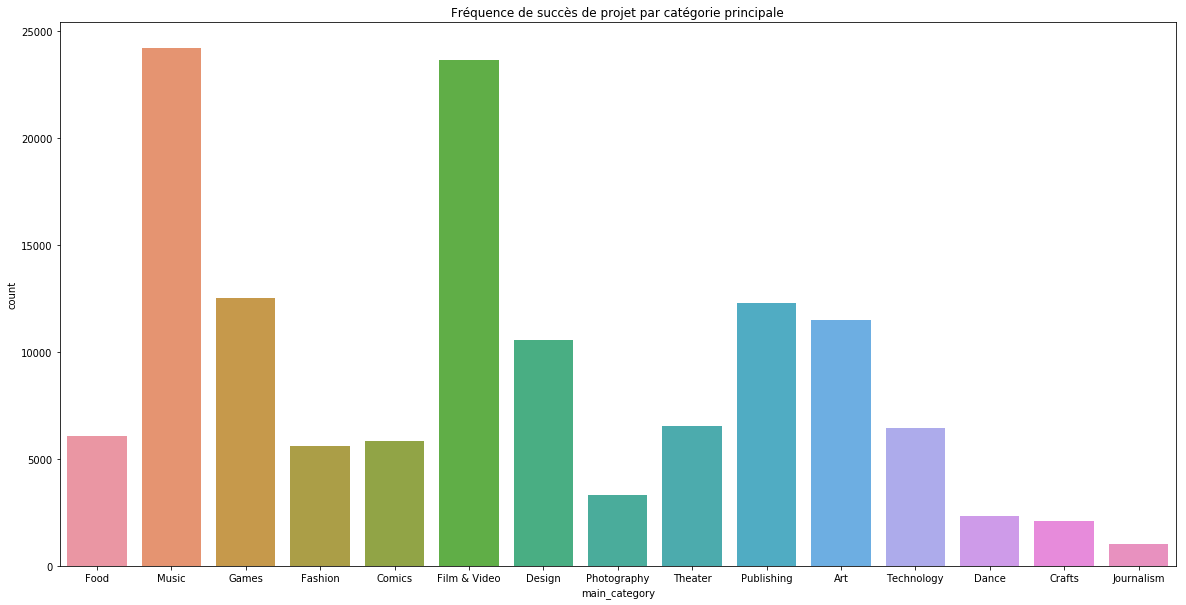

In [150]:
fig, axs = plt.subplots(nrows=1, figsize=(20,10), sharex=False)
sns.countplot(x="main_category", data=df_wopledged[df_wopledged["state"] == "successful"], ax=axs).set_title("Fréquence de succès de projet par catégorie principale")

On remarque donc assez rapidement que les projets ayant le plus d'échec sont de la catégorie Film & Vidéo, Publishing, Music et Technology.
Pour ce qui est des projets ayant le plus de réussite, ils sont de la catégorie Film & Vidéo, Music et Games.
Étant donné que ces graphs ne sont pas clair, il est préférable pour comprendre de calculer le pourcentage de réussite des projets, puis les calculer par catégorie dans une analyse multivarié.

## 5. Analyse multivariée

In [80]:
successful_project = df_wopledged[df_wopledged["state"] == "successful"]["state"].count() / df_wopledged["state"].count() * 100
print("Seulement {:f}% de tout les projets sont une réussite".format(successful_project))

Seulement 35.376234% de tout les projets sont une réussite


In [95]:
import warnings
warnings.simplefilter('ignore')
m_c = df_wopledged["main_category"].value_counts().keys().tolist()

for i in m_c:
    tmp_nb = df_wopledged[df_wopledged["main_category"] == i][df_wopledged["state"] == "successful"]["state"].count()
    total_prjct = df_wopledged[df_wopledged["main_category"] == i]["main_category"].count()
    prct = tmp_nb / total_prjct * 100
    print("{} : {:f}%  //  {} projets réussi sur {}".format(i, prct, tmp_nb, total_prjct))

Film & Video : 37.151844%  //  23623 projets réussi sur 63585
Music : 46.606187%  //  24197 projets réussi sur 51918
Publishing : 30.847169%  //  12300 projets réussi sur 39874
Games : 35.531208%  //  12518 projets réussi sur 35231
Technology : 19.754982%  //  6434 projets réussi sur 32569
Design : 35.084802%  //  10550 projets réussi sur 30070
Art : 40.883742%  //  11510 projets réussi sur 28153
Food : 24.733761%  //  6085 projets réussi sur 24602
Fashion : 24.513499%  //  5593 projets réussi sur 22816
Theater : 59.873545%  //  6534 projets réussi sur 10913
Comics : 53.997597%  //  5842 projets réussi sur 10819
Photography : 30.661471%  //  3305 projets réussi sur 10779
Crafts : 24.009536%  //  2115 projets réussi sur 8809
Journalism : 21.282860%  //  1012 projets réussi sur 4755
Dance : 62.048832%  //  2338 projets réussi sur 3768


Ainsi nous avons le taux de réussite de projet par catégorie. On y voit donc que c'est les projets de Dance, de Theatre et de Comics qui affichent le meilleur taux de réussite.
En revanche, les projets de Technologie, de Journalism et de Crafts affichent des taux assez faible.
Voici un graph illustrant mes calculs.

Text(0.5,1,'État des différents projets par catégorie principale')

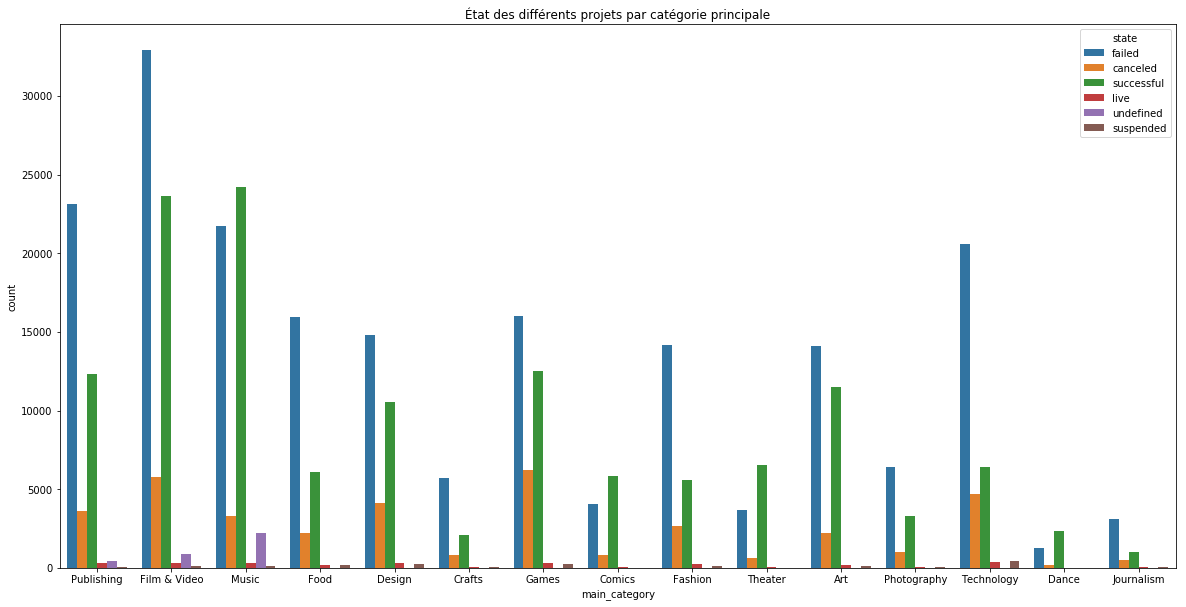

In [151]:
fig, axs = plt.subplots(nrows=1, figsize=(20,10), sharex=False)
sns.countplot(x="main_category", data=df_wopledged, hue="state", ax=axs).set_title("État des différents projets par catégorie principale")

C'est ainsi que l'on voit que la catégorie qui a le plus de projet et dont le taux de réussite est supérieur à 50% est la catégorie Music.

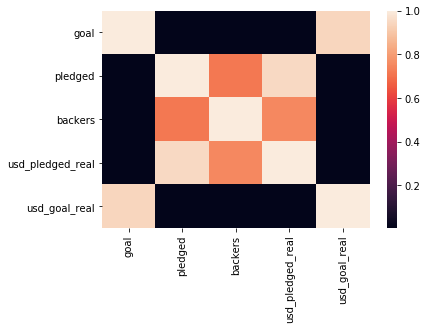

In [115]:
sns.heatmap(df_wopledged.corr())

Par ce heatmap, nous voyons une correlation entre le pledged et les backers, ce qui est très intéressant. Peut être que la réussite d'un projet ne dépend pas seulement des catégories mais aussi des backers.

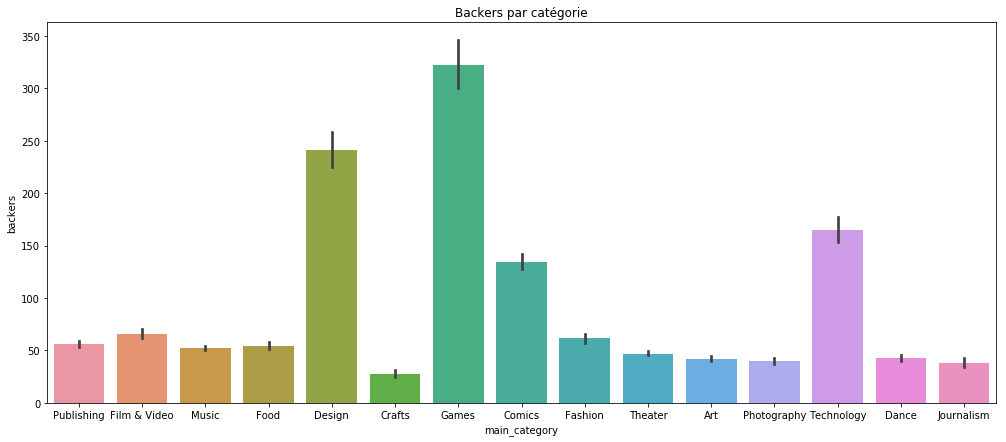

In [122]:
plt.figure(figsize = (17,7))
sns.barplot(x = 'main_category', y = 'backers', data=df_wopledged).set_title('Backers par catégorie')
plt.show()

On voit ici qu'il y a beaucoup de backers pour la catégorie Games, mais aussi pour le Design et la Technology

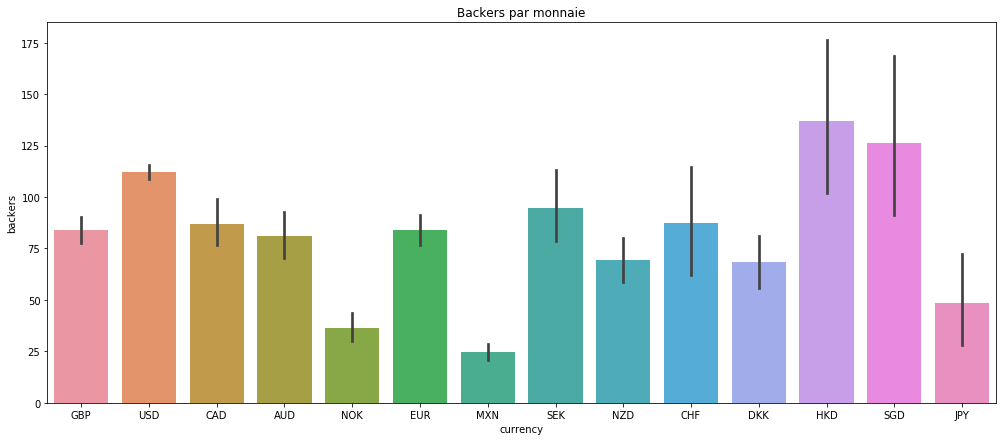

In [126]:
plt.figure(figsize = (17,7))
sns.barplot(x = 'currency', y = 'backers', data=df_wopledged).set_title('Backers par monnaie')
plt.show()

Même si les projets sont pour la plupart fait aux États-Unis, on remarque ici que les backers viennent un peu de partout, avec une légère domination des dollars de Hong Kong et de Singapour.

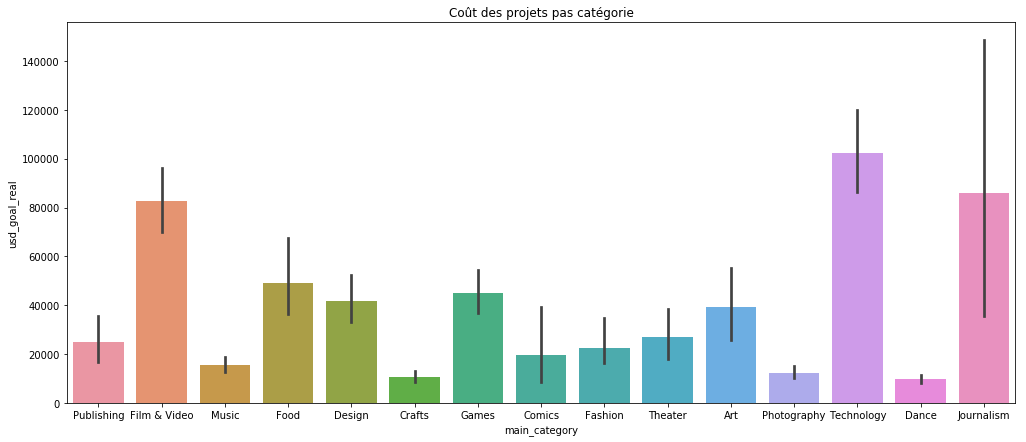

In [125]:
plt.figure(figsize = (17,7))
sns.barplot(x = 'main_category', y = 'usd_goal_real', data=df_wopledged).set_title('Coût des projets pas catégorie')
plt.show()

On remarque par ce Graph que les projet de Journalism, de Technology et de Film & Video sont les plus couteux. Quand on repense aux catégories ayant le plus de succès (Dance, Theater et Comics), on voit qu'ils coutent peu cher. 
Il en va de la même pour la catégorie Music, il y a beaucoup de projet, un taux de réussite positif et le projet coûte peu cher à accomplir.

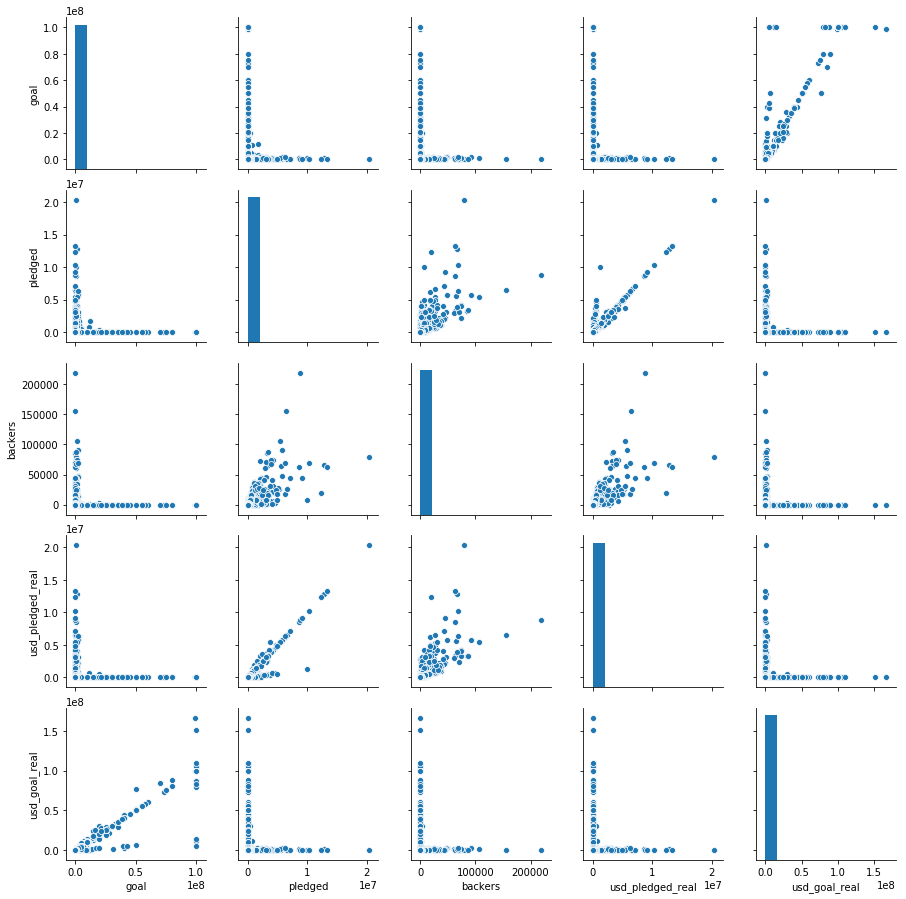

In [130]:
sns.pairplot(df_wopledged)

## 6. Conclusion

Pour conclure, je dirais que intuitivement, on est amené à penser que ce sont les projets ayant le plus de backers qui réussissent le plus. Or, nous avons vu précedemment que le nombre de backers n'influe pas forcément sur la réussite du projet. Je dirai qu'il ny a pas de facteurs vraiment déterminants à la réussite d'un projet, si ce n'est le coût du projet qui je pense à une influence tout de même assez importante.

Je suppose que le domaine est aussi une composante importante dans la réussite du projet, car on a put voir dans le domaine de la Technology et dans Games que le taux d'annulation et d'échec est assez fort car je suppose que ces domaines la sont très technique et compliqué.

Je ne peux rien conclure de manière très sure, car tout les cas sont différents, dans celui de la Music par exemple, il n'y a pas beaucoup de backers comparé au Games,  mais pourtant c'est la où il y a le plus de projet parmi les catégorie ou le taux de réussite est supérieur à 50%. Dans le cas de la Danse, il représente un taux de réussite très élevé, et il y a très peu de projet de cette catégorie et en moyenne ils ne sont pas très cher à réaliser.